In [2]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

# Check HiC-Pro and HiCCUPS Output Files for Pairs and Loop Information

#### read output logs helper functions

In [3]:
# for chr1 only
def read_hiccups_loop_files(file):
    loop_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                loop_info = info[0:6]
                loop_data[count] = loop_info
                count = count + 1
    return(loop_data)

In [4]:
def read_hicpro_stats_log(log):
    log_data = {}
    count = 0
    with open(log) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                pair_info = info[0:2]
                log_data[count] = pair_info
                count = count + 1
    return(log_data)

#### generate data frame with loop and pairs info

In [5]:
def generate_loop_df():
    loop_data = []
    samples = glob.glob('results/loops/hiccups/chr1/*Mus*/')
    for fn in samples:
        
        sample_info = []
        sample_name = fn.split('/')[4]
        sample_info.append(sample_name)
        sample_info.append(sample_name.split(".")[3])
            
        file_path_mpairstat = "results/hicpro/{sn}/hic_results/stats/{sn}/{sn}.mpairstat".format(sn = sample_name)
        file_path_mergestat = "results/hicpro/{sn}/hic_results/stats/{sn}/{sn}_allValidPairs.mergestat".format(sn = sample_name)
        
        if os.path.exists(file_path_mpairstat):
            pairs_info = read_hicpro_stats_log(file_path_mpairstat)
            sample_info.append(int(pairs_info[0][1]))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path_mergestat):
            pairs_info = read_hicpro_stats_log(file_path_mergestat)
            sample_info.append(int(pairs_info[0][1]))
        else:
            sample_info.append(int(0))
        
        
        file_path5 = os.path.join(fn, "postprocessed_pixels_5000.bedpe")
        file_path10 = os.path.join(fn, "postprocessed_pixels_10000.bedpe")
        file_path25 = os.path.join(fn, "postprocessed_pixels_25000.bedpe")
            
        if os.path.exists(file_path5):
            loop_info = read_hiccups_loop_files(file_path5)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path10):
            loop_info = read_hiccups_loop_files(file_path10)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path25):
            loop_info = read_hiccups_loop_files(file_path25)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
            
        loop_data.append(sample_info)
    loop_df = pd.DataFrame(loop_data)
    return loop_df

In [62]:
loop_df = generate_loop_df()

In [63]:
loop_df.columns = ["Sample Name", "Protein", "Total Pairs Processed", "Valid Interaction Pairs", "Number of 5kb Loops (VC)", "Number of 10kb Loops (VC)", "Number of 25kb Loops (VC)"]
loop_df

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
0,D6.GSE113339.Mus_Musculus.KLF4.b1,KLF4,71670008,34616350,0,1,19
1,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac.b1,H3K27ac,312246231,161973091,0,2,35
2,Treg_MT.GSE112176.Mus_Musculus.H3K27ac.b2,H3K27ac,296480438,177517232,118,190,191
3,Crypt_Hnf4DKO.GSE148691.Mus_Musculus.H3K4me3.b1,H3K4me3,134608599,60615238,3,19,88
4,Tconv.GSE189442.Mus_Musculus.H3K27ac.b1,H3K27ac,133066435,46040188,0,25,96
5,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac.b1,H3K27ac,235772877,107521678,3,6,33
6,3T3.GSE192387.Mus_Musculus.BATF.b1,BATF,254054774,104904556,39,149,282
7,ES.GSE113339.Mus_Musculus.KLF4.b3,KLF4,112710628,55495914,3,17,62
8,Myogenic_Progenitors_D6.GSE126362.Mus_Musculus.Pax3.b1,Pax3,94322652,40158170,4,15,90
9,EryP.GSE112717.Mus_Musculus.Gata1.b1,Gata1,219367612,76445680,0,1,8


#### sort table by Sample Name

In [8]:
loop_df = loop_df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
loop_df

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
0,3134_WT.GSE162617.Mus_Musculus.GR.b1,GR,60977251,25637471,0,0,0
1,3134_siCTRL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,GR,95173343,41120637,1,1,4
2,3134_siNIPBL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,GR,61528277,26626041,2,2,3
3,3T3.GSE192387.Mus_Musculus.BATF.b1,BATF,254054774,104904556,39,149,282
4,3T3.GSE192387.Mus_Musculus.CTCF.b1,CTCF,318884253,140970470,86,216,290
5,3T3_Irf4.GSE192387.Mus_Musculus.BATF.b1,BATF,227232360,101819415,43,114,214
6,3T3_Irf4_Runx3_Tbet.GSE192387.Mus_Musculus.BATF.b1,BATF,226938707,94683578,163,250,292
7,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1,SMC1A,524441382,206077769,70,219,356
8,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,SMC1A,552100726,215144683,358,572,530
9,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b1,H3K9me3,259862568,102005218,0,4,38


In [78]:
def parse_log(log):
    logs_data = []
    count = 0
    with open(log) as fr:
        for line in fr:
            if line.startswith('Data not available for'):
                info = line.strip()
                logs_data.append(info)
                count = count + 1
    return logs_data

In [108]:
log_data = []
logs = ['results/loops/logs/run_hiccups.{t}5522535-28', 
        'results/loops/logs/run_hiccups.{t}5522535-20',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-62',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-63',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-73',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-74',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-164',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-165',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-166']
for log in logs:
    sample_data = []
    curr_log = log
    data = parse_log(curr_log.format(t = 'e'))
    nc_5 = []
    nc_10 = []
    nc_25 = []
    for line in data:
        if "at 5000" in line:
            nc_5.append(line.split()[4])
        if "at 10000" in line:
            nc_10.append(line.split()[4])
        if "at 25000" in line:
            nc_25.append(line.split()[4]) 
    with open(log.format(t = 'o')) as l:
        for line in l:
            if 'sample_name' in line:
                sample_data.append(line.strip().split()[1])
    sample_data.append(nc_5)
    sample_data.append(nc_10)
    sample_data.append(nc_25)
    log_data.append(sample_data)
nv_df = pd.DataFrame(log_data)

In [109]:
columns = ['sample_name', 'chrs_not_converged_5kb', 'chrs_not_converged_10kb', 'chrs_not_converged_25kb']
nv_df.columns = columns
nv_df

,sample_name,chrs_not_converged_5kb,chrs_not_converged_10kb,chrs_not_converged_25kb
0,Caudate.GSE147672.Homo_Sapiens.H3K27ac.b2,"[1, Y]","[15, Y]","[15, Y]"
1,DCM_10.GSE165303.Homo_Sapiens.H3K27ac.b1,"[9, 11, Y]","[8, 9]","[1, 8, 9, 18]"
2,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,[18],"[9, 18]",[7]
3,DND41.GSE165207.Homo_Sapiens.H3K27ac.b2,[9],[18],[]
4,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1,"[9, 22, Y]","[10, 22, Y]","[10, Y]"
5,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2,"[5, 14, 22, Y]",[Y],"[11, Y]"
6,K562.GSE101498.Homo_Sapiens.H3K27ac.b1,"[9, 18, 21, Y]","[9, 11]","[6, 18]"
7,K562.GSE101498.Homo_Sapiens.H3K27ac.b2,"[9, 10, 15, 18]","[9, 18]",[]
8,K562.GSE101498.Homo_Sapiens.H3K27ac.b3,"[12, Y]",[],"[11, 17]"


#### sort table by Valid Interaction Pairs (greatest to least)

In [9]:
loop_df = loop_df.sort_values(by=["Valid Interaction Pairs"], ascending=False).reset_index(drop=True)
loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loop_df)

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
1,Cardiac_Embryo_DKO.GSE121671.Mus_Musculus.SMC1A.b1,SMC1A,851533840,407209158,2,16,99
2,mESC.GSE150906.Mus_Musculus.H3K27ac.b1,H3K27ac,871751250,383681302,77,143,223
3,Cardiac_Embryo_WT.GSE121671.Mus_Musculus.SMC1A.b1,SMC1A,598637597,300896163,3,43,138
4,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b2,H3K27ac,538404156,295673408,1,10,66
5,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b1,H3K27ac,486021039,254946405,3,30,145
6,mESC.GSE150906.Mus_Musculus.H3K27me3.b1,H3K27me3,644288043,239846034,41,138,212
7,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A.b2,SMC1A,677198895,234799075,8,56,150
8,NOD_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b2,H3K27ac,467437713,223489171,1,9,66
9,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,SMC1A,552100726,215144683,358,572,530
10,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A.b1,SMC1A,494348866,215094290,15,66,154


## Plot HiCCUPS Loops versus Valid Pairs

#### distrubutions of each loop type

count    194.000000
mean      34.505155
std       97.105479
min        0.000000
25%        0.000000
50%        2.000000
75%       12.750000
max      630.000000
Name: Number of 5kb Loops (VC), dtype: float64

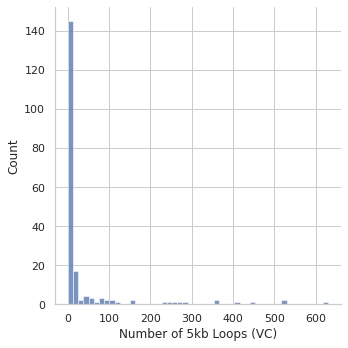

In [10]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=50, x="Number of 5kb Loops (VC)")
loop_df["Number of 5kb Loops (VC)"].describe()

count    194.000000
mean      55.515464
std      103.148076
min        0.000000
25%        3.000000
50%       15.000000
75%       53.250000
max      572.000000
Name: Number of 10kb Loops (VC), dtype: float64

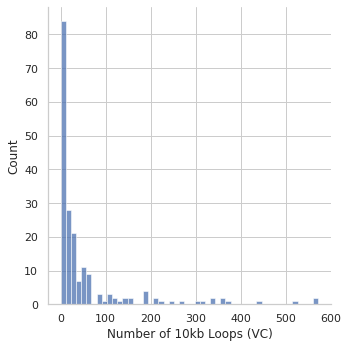

In [11]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=50, x="Number of 10kb Loops (VC)")
loop_df["Number of 10kb Loops (VC)"].describe()

count    194.000000
mean      89.850515
std       86.930878
min        0.000000
25%       24.000000
50%       65.500000
75%      121.750000
max      530.000000
Name: Number of 25kb Loops (VC), dtype: float64

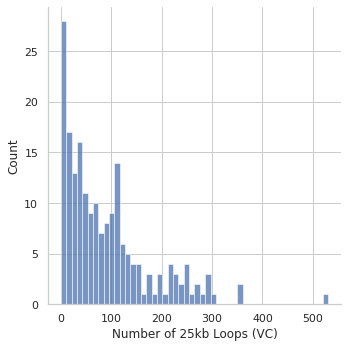

In [12]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=50, x="Number of 25kb Loops (VC)")
loop_df["Number of 25kb Loops (VC)"].describe()

In [13]:
np.percentile(loop_df["Number of 5kb Loops (VC)"], [10, 25, 50, 75, 99])

array([  0.  ,   0.  ,   2.  ,  12.75, 520.14])

In [14]:
np.percentile(loop_df["Number of 10kb Loops (VC)"], [10, 25, 50, 70, 75, 99])

array([  1.  ,   3.  ,  15.  ,  39.2 ,  53.25, 526.73])

In [15]:
np.percentile(loop_df["Number of 25kb Loops (VC)"], [10, 25, 50, 70, 75, 99])

array([  5.3 ,  24.  ,  65.5 , 110.1 , 121.75, 356.21])

In [16]:
loop_df.describe()

,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
count,1.940000e+02,1.940000e+02,194.000000,194.000000,194.000000
mean,1.872991e+08,7.683126e+07,34.505155,55.515464,89.850515
std,1.457916e+08,6.862598e+07,97.105479,103.148076,86.930878
min,2.003312e+06,7.724370e+05,0.000000,0.000000,0.000000
25%,9.168034e+07,3.352128e+07,0.000000,3.000000,24.000000
50%,1.402473e+08,5.533984e+07,2.000000,15.000000,65.500000
75%,2.451966e+08,1.014559e+08,12.750000,53.250000,121.750000
max,8.717512e+08,4.072092e+08,630.000000,572.000000,530.000000


#### plot valid interaction pairs vs. number 25kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (VC)'>

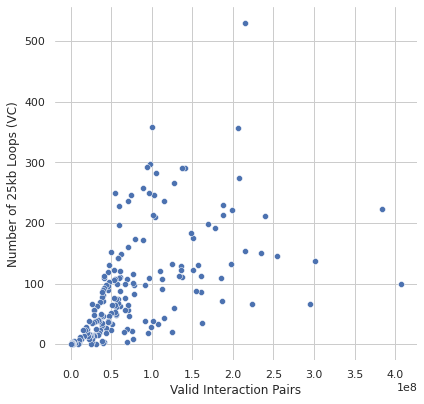

In [17]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (VC)",
                data=loop_df,
                ax=ax)

#### plot valid interaction pairs vs. number 10kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (VC)'>

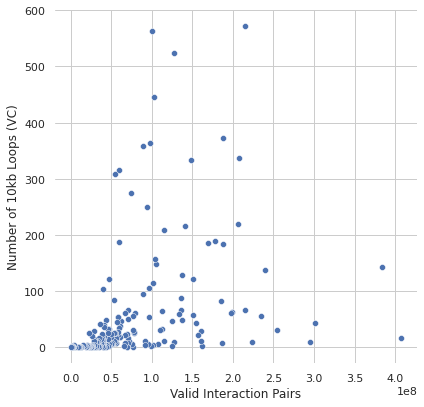

In [18]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=loop_df,
                ax=ax,
                palette="pastel")

#### plot valid interaction pairs vs. number 5kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

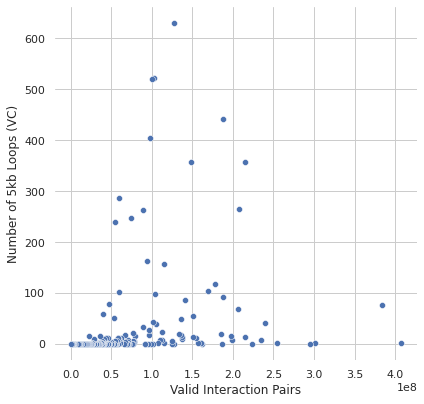

In [19]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=loop_df,
                ax=ax,
                palette="pastel")

## Plotting Loops versus Valid Pairs using a Soft Threshold

In [20]:
soft_threshold = 2e8
soft_data = loop_df.loc[loop_df['Valid Interaction Pairs'] < soft_threshold]

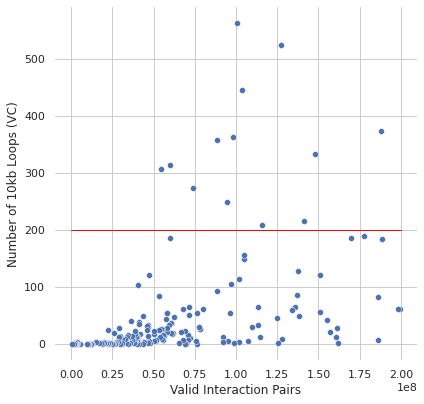

In [21]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                palette="pastel"
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

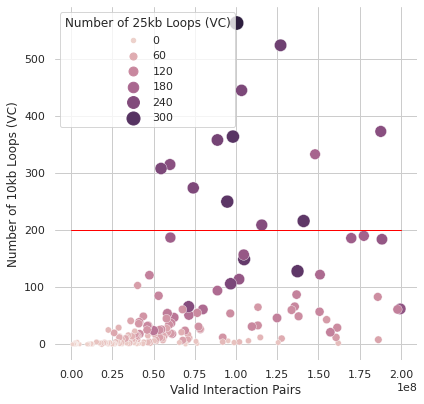

In [22]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                hue="Number of 25kb Loops (VC)",
                size="Number of 25kb Loops (VC)",
                sizes=(20, 200)
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

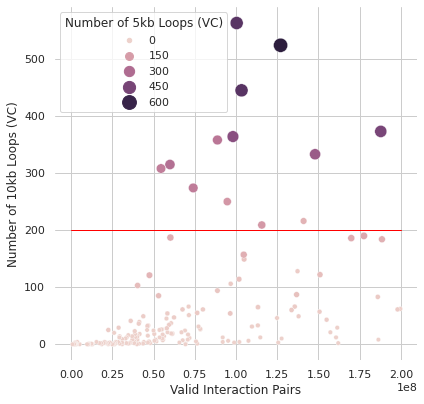

In [23]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                hue="Number of 5kb Loops (VC)",
                size="Number of 5kb Loops (VC)",
                sizes=(20, 200)
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

/tmp/ipykernel_86273/4014189437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soft_data.at[index, 'Number 25kb loops > 355?'] = "no"


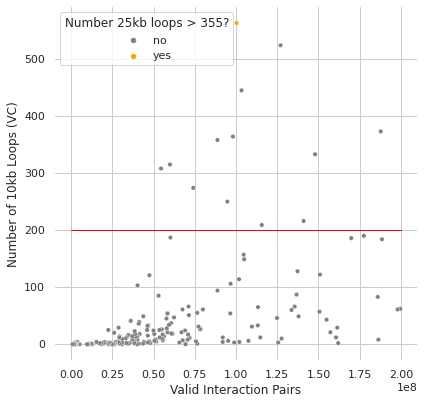

In [24]:
for index, row in soft_data.iterrows():
    if int(row['Number of 25kb Loops (VC)']) > 355:
        soft_data.at[index, 'Number 25kb loops > 355?'] = "yes"
    else:
        soft_data.at[index, 'Number 25kb loops > 355?'] = "no"

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                hue="Number 25kb loops > 355?",
                size="Number 25kb loops > 355?",
                sizes=(20, 20),
                palette=["gray", "orange"]
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (VC)'>

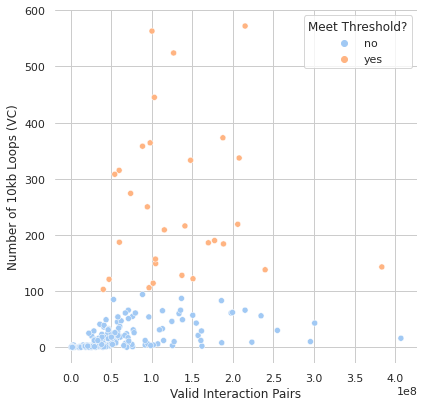

In [64]:
meet_thres = loop_df
for index, row in meet_thres.iterrows():
    if int(row['Number of 10kb Loops (VC)']) > 100:
        meet_thres.at[index, 'Meet Threshold?'] = "yes"
    else:
        meet_thres.at[index, 'Meet Threshold?'] = "no"
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=loop_df,
                ax=ax,
                hue="Meet Threshold?",
                palette="pastel"
                )

In [26]:
for protein in loop_df.Protein.unique():
    print(protein, loop_df['Protein'].value_counts()[protein])


SMC1A 18
H3K27ac 84
H3K27me3 3
H3K4me3 19
Oct4 6
CTCF 10
KLF4 11
Gata1 4
BATF 4
H3K9me3 4
Pax3 9
RYBP 2
GR 3
Lbd1 3
FoxP3 2
FGFR1 4
YY1 6
IgG 2


In [27]:
h3k27ac = loop_df.loc[loop_df["Protein"] == "H3K27ac"]
ctcf = loop_df.loc[loop_df["Protein"] == "CTCF"]
smc1a = loop_df.loc[loop_df["Protein"] == "SMC1A"]
h3k4me3 = loop_df.loc[loop_df["Protein"] == "H3K4me3"]

count     84.000000
mean      51.714286
std       97.533383
min        0.000000
25%        4.000000
50%       14.500000
75%       47.500000
max      563.000000
Name: Number of 10kb Loops (VC), dtype: float64

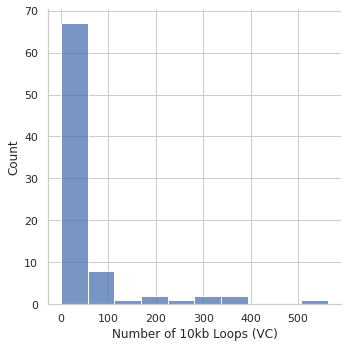

In [46]:
sns.displot(h3k27ac, bins=10, x="Number of 10kb Loops (VC)")
h3k27ac["Number of 10kb Loops (VC)"].describe()

count     10.000000
mean      46.500000
std       82.201987
min        0.000000
25%        2.500000
50%       13.000000
75%       15.500000
max      216.000000
Name: Number of 10kb Loops (VC), dtype: float64

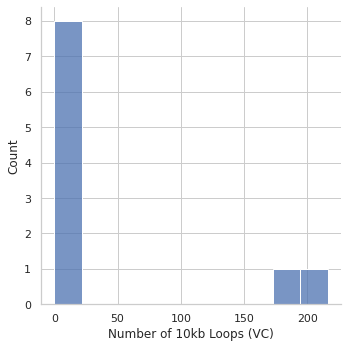

In [47]:
sns.displot(ctcf, bins=10, x="Number of 10kb Loops (VC)")
ctcf["Number of 10kb Loops (VC)"].describe()

count     18.000000
mean     128.666667
std      140.456399
min       16.000000
25%       48.000000
50%       63.500000
75%      177.250000
max      572.000000
Name: Number of 10kb Loops (VC), dtype: float64

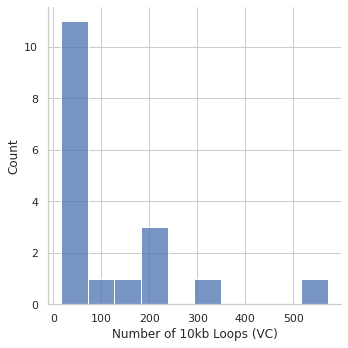

In [48]:
sns.displot(smc1a, bins=10, x="Number of 10kb Loops (VC)")
smc1a["Number of 10kb Loops (VC)"].describe()

count     19.000000
mean     111.947368
std      168.289590
min        0.000000
25%       18.500000
50%       29.000000
75%       94.000000
max      524.000000
Name: Number of 10kb Loops (VC), dtype: float64

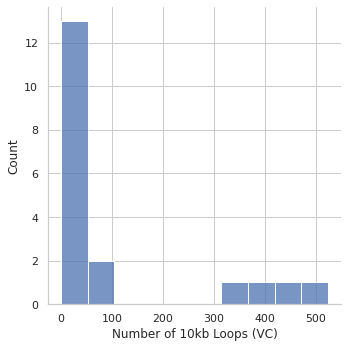

In [49]:
sns.displot(h3k4me3, bins=10, x="Number of 10kb Loops (VC)")
h3k4me3["Number of 10kb Loops (VC)"].describe()

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

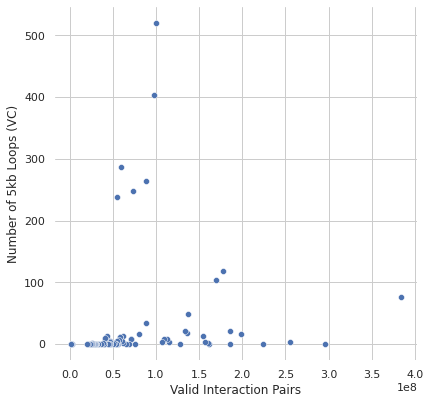

In [50]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=h3k27ac,
                ax=ax,
                palette="pastel")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

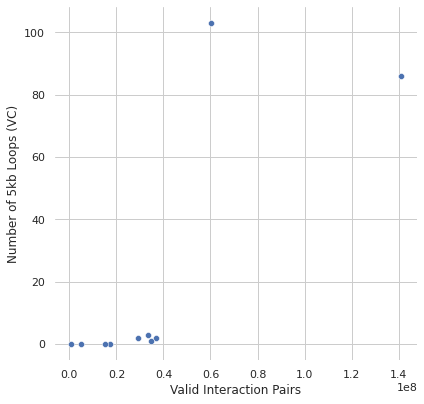

In [51]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=ctcf,
                ax=ax,
                palette="pastel")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

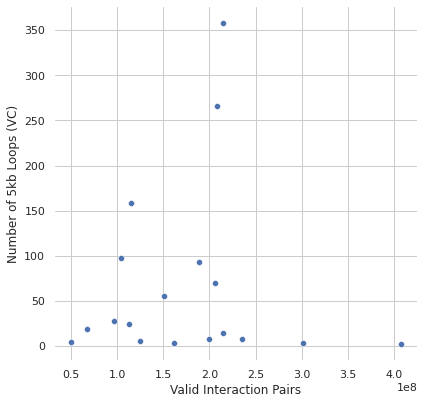

In [52]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=smc1a,
                ax=ax,
                palette="pastel")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

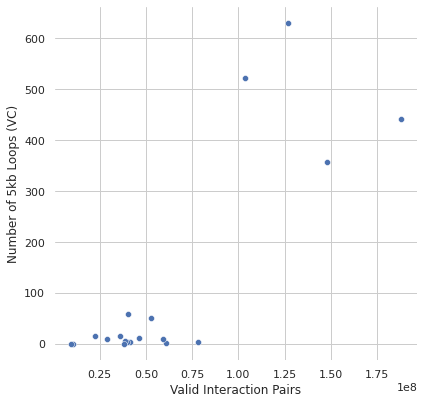

In [53]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=h3k4me3,
                ax=ax,
                palette="pastel")

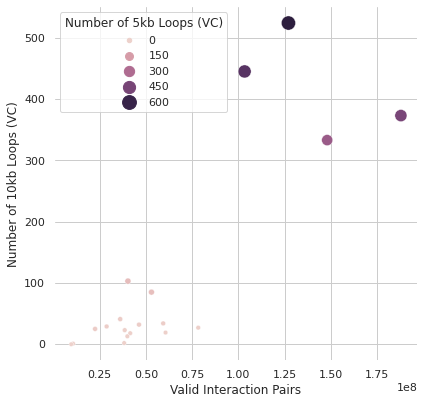

In [61]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=h3k4me3,
                ax=ax,
                hue="Number of 5kb Loops (VC)",
                size="Number of 5kb Loops (VC)",
                sizes=(20, 200)
                )

### Decided Threshold: >=50 10kb loops OR >=11 5kb loops

## Get Samples that Meet Threshold

In [65]:
meet_thres = meet_thres.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
meet_thres = meet_thres.loc[meet_thres['Meet Threshold?'] == "yes"].reset_index(drop=True)
meet_thres

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC),Meet Threshold?
0,3T3.GSE192387.Mus_Musculus.BATF.b1,BATF,254054774,104904556,39,149,282,yes
1,3T3.GSE192387.Mus_Musculus.CTCF.b1,CTCF,318884253,140970470,86,216,290,yes
2,3T3_Irf4.GSE192387.Mus_Musculus.BATF.b1,BATF,227232360,101819415,43,114,214,yes
3,3T3_Irf4_Runx3_Tbet.GSE192387.Mus_Musculus.BATF.b1,BATF,226938707,94683578,163,250,292,yes
4,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1,SMC1A,524441382,206077769,70,219,356,yes
5,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,SMC1A,552100726,215144683,358,572,530,yes
6,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3.b1,H3K4me3,95515140,40284214,59,103,82,yes
7,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3.b1,H3K4me3,323589915,147937766,357,333,184,yes
8,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3.b2,H3K4me3,399091731,187780354,442,373,230,yes
9,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A.b1,SMC1A,412007905,150915849,56,122,175,yes


In [67]:
print(len(meet_thres), 'samples meet threshold out of 194 samples', round(len(meet_thres)/194*100, 2), '%')

30 samples meet threshold out of 194 samples 15.46 %


In [69]:
samplesheet = '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/current-post-hicpro-without-header.tsv'
new_samples = '/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/hicpro/2022.09.27.09.39.hicpro.samplesheet.without_header.tsv'
samples_to_run = []

index = 1
with open(new_samples) as ss:
    for line in ss:
        info = line.strip().split()
        sample = info[0]
        if(sample in meet_thres.values):
            samples_to_run.append(str(index))
        index += 1
print(','.join(samples_to_run))
print("length:", len(samples_to_run))

12,14,20,21,40,41,42,43,44,45,47,107,108,120,146,147,162,163,164,165,166,167,168,169,170,171,172,173,174,175
length: 30


# Check HiC-Pro and HiCCUPS Output Files for Pairs and Loop Information

#### generate loop df

In [39]:
thres1_loop_df = generate_loop_df()
thres1_loop_df.columns = ["Sample Name", "Total Pairs Processed", "Valid Interaction Pairs", "Number of 5kb Loops (all chrs)", "Number of 10kb Loops (all chrs)", "Number of 25kb Loops (all chrs)"]

#### sort df by sample name

In [40]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,278154964,100153514,237,1174,2895
2,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,171412471,65258210,517,1741,3721
3,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5,267255826,108090920,97,637,2523
4,A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b1,264799171,106959156,124,794,2490
5,A673_WT.GSE133227.Homo_Sapiens.CTCF.b4,147524807,57203051,112,900,2645
6,A673_WT.GSE133227.Homo_Sapiens.CTCF.b5,258146361,99574452,102,570,2082
7,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,2999,4867,5199
8,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,691966559,151539207,242,1164,2133
9,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,269649847,138186301,763,1306,1598
10,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,277758441,138775067,577,1149,1846


#### sort df by number of 5kb loops, greatest to least

In [41]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Number of 5kb Loops (all chrs)"], ascending=False).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,27188,32829,20182
2,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,18958,22042,13067
3,THP-1-del-eIFIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,265050415,120253465,16454,17881,11818
4,THP-1-del-TRP-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,285802803,105411101,14505,16820,11707
5,THP-1-del-cIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,267596749,110135040,13991,16775,10784
6,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,290786588,166936714,12997,12199,6861
7,THP-1-WT-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,290788835,123517484,12419,14263,8278
8,THP-1-del-cIDR-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,316000577,130392942,12057,13855,9520
9,DND41.GSE165207.Homo_Sapiens.H3K27ac.b2,256264966,148369570,11687,11443,6782
10,THP-1-WT-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,252514040,116731209,11590,14299,9215


#### sort df by number of 10kb loops, greatest to least

In [42]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Number of 10kb Loops (all chrs)"], ascending=False).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,27188,32829,20182
2,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,18958,22042,13067
3,THP-1-del-eIFIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,265050415,120253465,16454,17881,11818
4,THP-1-del-TRP-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,285802803,105411101,14505,16820,11707
5,THP-1-del-cIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,267596749,110135040,13991,16775,10784
6,H9-HS-KI.GSE105028.Homo_Sapiens.Rad21.b1,199983939,38015306,6291,14321,12906
7,THP-1-WT-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,252514040,116731209,11590,14299,9215
8,THP-1-WT-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,290788835,123517484,12419,14263,8278
9,THP-1-del-cIDR-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,316000577,130392942,12057,13855,9520
10,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,290786588,166936714,12997,12199,6861


#### plot loop data

count      190.000000
mean      2729.684211
std       3870.025054
min         25.000000
25%        504.750000
50%       1068.500000
75%       3577.500000
max      27188.000000
Name: Number of 5kb Loops (all chrs), dtype: float64

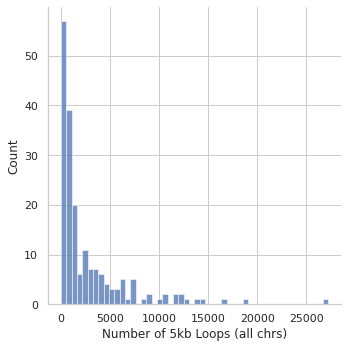

In [43]:
sns.displot(thres1_loop_df, bins=50, x="Number of 5kb Loops (all chrs)")
thres1_loop_df["Number of 5kb Loops (all chrs)"].describe()

count      190.00000
mean      4211.30000
std       4364.82147
min        120.00000
25%       1405.25000
50%       2577.50000
75%       5608.00000
max      32829.00000
Name: Number of 10kb Loops (all chrs), dtype: float64

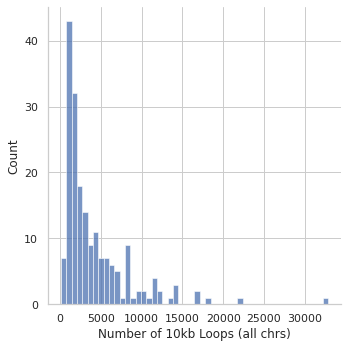

In [44]:
sns.displot(thres1_loop_df, bins=50, x="Number of 10kb Loops (all chrs)")
thres1_loop_df["Number of 10kb Loops (all chrs)"].describe()

count      190.000000
mean      4461.836842
std       2666.763292
min        253.000000
25%       2523.000000
50%       4116.500000
75%       5567.500000
max      20182.000000
Name: Number of 25kb Loops (all chrs), dtype: float64

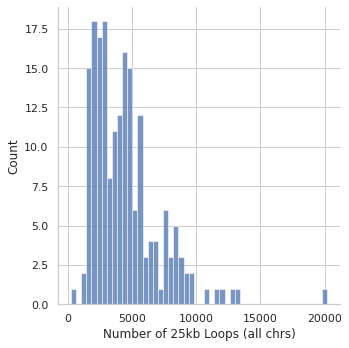

In [45]:
sns.displot(thres1_loop_df, bins=50, x="Number of 25kb Loops (all chrs)")
thres1_loop_df["Number of 25kb Loops (all chrs)"].describe()

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (all chrs)'>

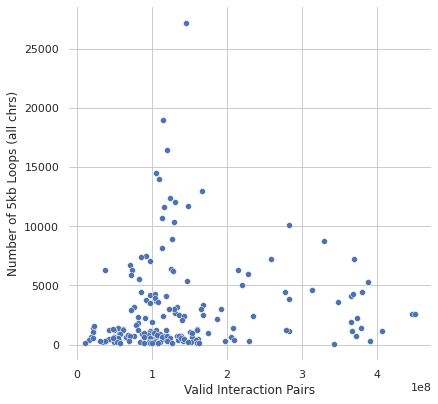

In [46]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (all chrs)'>

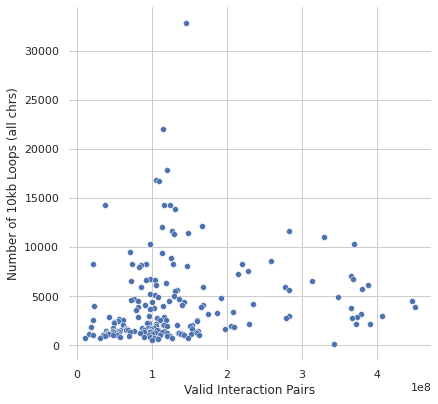

In [47]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (all chrs)'>

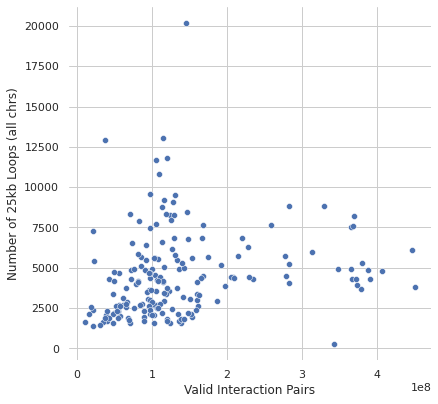

In [48]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

In [16]:
paths = glob.glob('results/loops/hiccups_vc/*.txt')

In [17]:
data = []
for path in paths:
    sample_data = []
    samples = []
    sample_name = path.split('/')[3].split('5000_')[0].split("_")[0]
    for path in paths:
        if sample_name in path:
            samples.append(path)
    normalization = path.split('/')[3].split('5000_')[0].split("_")[1]
    type_overlap = path.split('/')[3].split('5000_')[1].split('.')[0]
    
    sample_data.append(sample_name)
    
    with open(path) as f:
        lines = f.readlines()
        sample_data.append(len(lines))
    data.append(sample_data)
    
overlap_df = pd.DataFrame(data)  

In [20]:
cols = ["sample_name", "overlap_mode", "number_overlaps"]
overlap_df.columns = cols
overlap_df.sort_values(by="sample_name").reset_index(drop=True)

,sample_name,overlap_mode,number_overlaps
0,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_kr,both,7378
1,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_kr,either,10829
2,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_kr,neither,532
3,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_vc,both,5563
4,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_vc,either,8245
5,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_vc,neither,404
6,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_kr,both,6466
7,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_kr,neither,473
8,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_kr,either,9649
9,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_vc,neither,380


<AxesSubplot:xlabel='sample_name', ylabel='number_overlaps'>

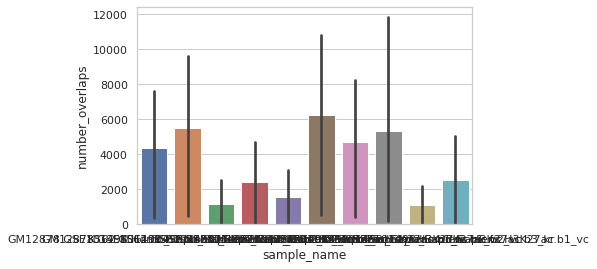

In [29]:
sns.barplot(data=overlap_df, x="sample_name", y = "number_overlaps")